<a href="https://colab.research.google.com/github/hayriyeanill/FaceMaskClassifier/blob/main/image_classification_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import shutil
import os
import tensorflow as tf


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
original_src = "/content/drive/MyDrive/Colab Notebooks/CMP5133_Project/"
print(os.listdir(original_src))

src_with_mask = os.path.join(original_src, 'with_mask')
with_mask_dir = os.listdir(src_with_mask)

src_without_mask = os.path.join(original_src, 'without_mask')
without_mask_dir = os.listdir(src_without_mask)

print(len(without_mask_dir), len(with_mask_dir))

['with_mask', 'without_mask', 'train', 'validation', 'image_classification_transfer_learning.ipynb']
2994 2994


In [ ]:
def rename_image_labels(new_name, file, src):
  for filename in file:
    old_name_dir = os.path.join(src, filename)
    new_name_dir = os.path.join(src, new_name + filename)
    print(old_name_dir, new_name_dir)
    os.rename(old_name_dir, new_name_dir)

rename_image_labels("with_mask_", with_mask_dir, src_with_mask)
rename_image_labels("without_mask_", without_mask_dir, src_without_mask)

In [ ]:
# Create train and validation folder
train = os.path.join(original_src, 'train')
#os.mkdir(train)
train_with_mask= os.path.join(train, 'with_mask')
#os.mkdir(train_with_mask)
train_without_mask= os.path.join(train, 'without_mask')
#os.mkdir(train_without_mask)

validation = os.path.join(original_src, 'validation')
#os.mkdir(validation)
val_with_mask= os.path.join(validation, 'with_mask')
#os.mkdir(val_with_mask)
val_without_mask = os.path.join(validation, 'without_mask')
#os.mkdir(val_without_mask)

In [ ]:
def upload_train_file(file_name, src_dir, dst_dir):
  fname = [file_name +'{}.png'.format(i) for i in range(1, 1994)]
  for f in fname:
    src = os.path.join(src_dir, f)
    dst = os.path.join(dst_dir, f)
    print("src",src)
    print("dst",dst)
    shutil.copyfile(src,dst)


# upload_train_file("with_mask_", src_with_mask, train_with_mask)
# upload_train_file("without_mask_", src_without_mask, train_without_mask)

def upload_validation_file(file_name, src_dir, dst_dir):
  fname = [file_name +'{}.png'.format(i) for i in range(1994, 2994)]
  for f in fname:
    src = os.path.join(src_dir, f)
    dst = os.path.join(dst_dir, f)
    print("src",src)
    print("dst",dst)
    shutil.copyfile(src,dst)

upload_validation_file("with_mask_", src_with_mask, val_with_mask)
upload_validation_file("without_mask_", src_without_mask, val_without_mask)


In [ ]:
train_with_mask_dir = os.listdir(train_with_mask)
train_without_mask_dir = os.listdir(train_without_mask)
validation_with_mask_dir = os.listdir(val_with_mask)
validation_without_mask_dir = os.listdir(val_without_mask)

print(len(train_with_mask_dir), len(train_without_mask_dir))
print(len(validation_with_mask_dir), len(validation_without_mask_dir))

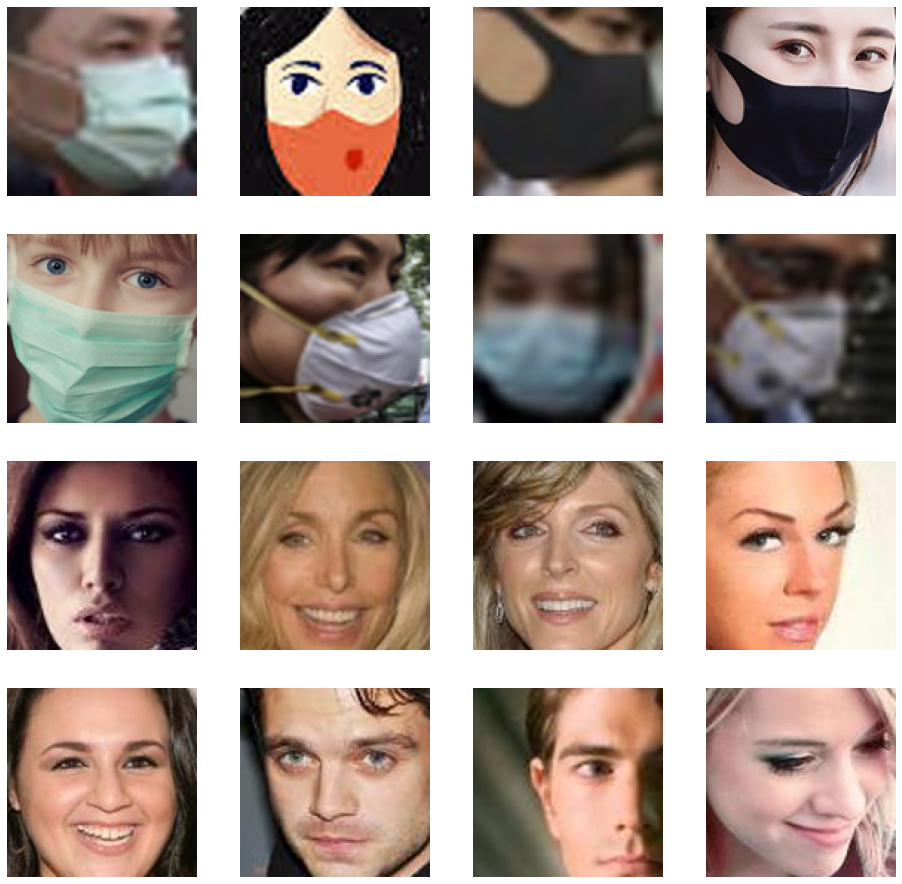

In [ ]:
# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(4 * 4, 4 * 4)

pic_index += 8
next_with_mask_pix = [os.path.join(train_with_mask, fname) for fname in train_with_mask_dir[pic_index-8:pic_index]]
next_without_mask_pix = [os.path.join(train_without_mask, fname) for fname in train_without_mask_dir[pic_index-8:pic_index]]


for i, img_path in enumerate(next_with_mask_pix+next_without_mask_pix):
  sp = plt.subplot(4, 4, i + 1)
  sp.axis('Off') # Don't show axes

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Transfer Learning with InceptionV3

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()

--2021-06-11 18:07:07--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  87.3MB/s    in 1.0s    

2021-06-11 18:07:08 (87.3 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0         

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense  (1, activation='sigmoid')(x)           

model = tf.keras.Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 100 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(150, 150),
        batch_size=100,
        class_mode='binary')

# Flow training images in batches of 20 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


In [ ]:
callbacks = myCallback()

history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=10, callbacks=[callbacks])


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy with Transfer Learning')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss with Transfer Learning')
plt.legend()
plt.show()